In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report

#### Overdraft

In [147]:
df = pd.read_excel("Data_set/OvD.xlsx")

In [148]:
df = df.loc[1:,:]
df1 = df.drop(['Date of disbursment ', 'Kod','Birthday (day/monthly/year)','Fido', 'NRP', 'Unnamed: 2',"Duration (in months)",
       'Bank of Albania sector_16 (individuals)', 'Maturity date', 'Birthday (day/monthly/year).1', 'Monthly Installment of the loan-Converdted',
         'Other installments of other loans_Converted', "Type of Loan (if it's loan or overdraft)",'Currency'],axis=1)
#df1['Gender'][df1['Gender']=='F']=0
#df1['Gender'][df1['Gender']=='M']=1

y = df1['Loan classification'].copy()
y[y==1] = -1
y[y==0] = 1

X = df1.drop(['Loan classification'],axis = 1)

Y = df1['Loan classification']

badnum=len(Y[Y==-1])    # amount of bad clients
goodnum=Y.count()-badnum

In [149]:
df = X
df['Credit Registry Information'][df['Credit Registry Information']==1] = 'Credit Registry Information_Not have history'
df['Credit Registry Information'][df['Credit Registry Information']==2] = 'Credit Registry Information_Not and has not been categorized'
df['Credit Registry Information'][df['Credit Registry Information']==3] = 'Credit Registry Information_been categorized'
df['Credit Registry Information'][df['Credit Registry Information']==4] = 'Credit Registry Information_currently categorized'

df['Education Type'][df['Education Type']==1] = 'Education_Without education'
df['Education Type'][df['Education Type']==2] = 'Education_Elementary'
df['Education Type'][df['Education Type']==3] = 'Education_Secondary/Less than high school'
df['Education Type'][df['Education Type']==4] = 'Education_College/High school'
df['Education Type'][df['Education Type']==5] = 'Education_University'

df['Gender'][df['Gender']==0]='Gender_Male'
df['Gender'][df['Gender']==1]='Gender_Female'

df['Marital Status'][df['Marital Status']==1] = 'Marital Status_Single'
df['Marital Status'][df['Marital Status']==2] = 'Marital Status_Married'
df['Marital Status'][df['Marital Status']==3] = 'Marital Status_Widowed'
df['Marital Status'][df['Marital Status']==4] = 'Marital Status_Seperated'
df['Marital Status'][df['Marital Status']==5] = 'Marital Status_Divorced'

df['Residential Status'][df['Residential Status']==0] = 'Residential Status_Rent'
df['Residential Status'][df['Residential Status']==1] = 'Residential Status_Co-owner'
df['Residential Status'][df['Residential Status']==2] = 'Residential Status_Owner'
df['Residential Status'][df['Residential Status']==3] = 'Residential Status_Others'
df['Residential Status'][df['Residential Status']==4] = 'Residential Status_Live with parents'

df['Employment Type '][df['Employment Type ']==1] = 'Employment_Student'
df['Employment Type '][df['Employment Type ']==2] = 'Employment_Household'
df['Employment Type '][df['Employment Type ']==3] = 'Employment_Retired'
df['Employment Type '][df['Employment Type ']==4] = 'Employment_In expectation of the first employment'
df['Employment Type '][df['Employment Type ']==5] = 'Employment_Unemplyed'
df['Employment Type '][df['Employment Type ']==6] = 'Employment_Public sector'
df['Employment Type '][df['Employment Type ']==7] = 'Employment_Privated sector'
df['Employment Type '][df['Employment Type ']==8] = 'Employment_Self_emplyed'
df['Employment Type '][df['Employment Type ']==9] = 'Employment_Administator'

df['Reference'][df['Reference']==1]='Reference from bank staff'
df['Reference'][df['Reference']==2]='Reference not from bank staff'
df['Reference'][df['Reference']==3]='Reference_no information'

In [150]:
y = df1['Loan classification'].copy()
y[y==1] = -1
y[y==0] = 1
data = X
data['target'] = y

In [151]:
X.head()

,Approved loan,Age,Gender,Marital Status,Number of family members,Education Type,Number of years at the current address,Employment Type,Current years at job,Residential Status,Credit Registry Information,Monthly Installment of the loan,Other installments of other loans,Monthly Income,Reference,target
1,180000,45,F,Marital Status_Married,1,Education_University,17.41,Employment_Public sector,1.58,Residential Status_Owner,Credit Registry Information_Not and has not be...,5000,0,68000,Reference not from bank staff,1
2,300000,54,M,Marital Status_Married,3,Education_University,17.58,Employment_Administator,21.08,Residential Status_Co-owner,Credit Registry Information_currently categorized,4000,100000,500000,Reference from bank staff,1
3,217000,51,M,Marital Status_Married,1,Education_University,31.25,Employment_Privated sector,13.25,Residential Status_Owner,Credit Registry Information_Not and has not be...,2170,41160,95000,Reference from bank staff,1
4,70000,48,M,Marital Status_Married,1,Education_University,12.33,Employment_Privated sector,7,Residential Status_Owner,Credit Registry Information_Not and has not be...,2000,8000,90000,Reference not from bank staff,1
5,1.81935e+06,52,M,Marital Status_Married,1,Education_University,10.91,Employment_Administator,12.91,Residential Status_Owner,Credit Registry Information_Not and has not be...,195,0,300000,Reference not from bank staff,1


In [152]:
data.columns

Index(['Approved loan', 'Age', 'Gender', 'Marital Status',
       'Number of family members ', 'Education Type',
       'Number of years at the current address', 'Employment Type ',
       'Current years at job', 'Residential Status',
       'Credit Registry Information', 'Monthly Installment of the loan',
       'Other installments of other loans', 'Monthly Income ', 'Reference',
       'target'],
      dtype='object')

In [153]:
data.head()

,Approved loan,Age,Gender,Marital Status,Number of family members,Education Type,Number of years at the current address,Employment Type,Current years at job,Residential Status,Credit Registry Information,Monthly Installment of the loan,Other installments of other loans,Monthly Income,Reference,target
1,180000,45,F,Marital Status_Married,1,Education_University,17.41,Employment_Public sector,1.58,Residential Status_Owner,Credit Registry Information_Not and has not be...,5000,0,68000,Reference not from bank staff,1
2,300000,54,M,Marital Status_Married,3,Education_University,17.58,Employment_Administator,21.08,Residential Status_Co-owner,Credit Registry Information_currently categorized,4000,100000,500000,Reference from bank staff,1
3,217000,51,M,Marital Status_Married,1,Education_University,31.25,Employment_Privated sector,13.25,Residential Status_Owner,Credit Registry Information_Not and has not be...,2170,41160,95000,Reference from bank staff,1
4,70000,48,M,Marital Status_Married,1,Education_University,12.33,Employment_Privated sector,7,Residential Status_Owner,Credit Registry Information_Not and has not be...,2000,8000,90000,Reference not from bank staff,1
5,1.81935e+06,52,M,Marital Status_Married,1,Education_University,10.91,Employment_Administator,12.91,Residential Status_Owner,Credit Registry Information_Not and has not be...,195,0,300000,Reference not from bank staff,1


In [154]:
data['Age'] = data['Age'].astype('int')
data['Approved loan'] = data['Approved loan'].astype('int')
data['Number of years at the current address'] = data['Number of years at the current address'].astype('float')
data['Current years at job'] = data['Current years at job'].astype('float')
data['Monthly Installment of the loan'] = data['Monthly Installment of the loan'].astype('int')
data[ 'Other installments of other loans'] = data[ 'Other installments of other loans'].astype('int')
data['Monthly Income '] = data['Monthly Income '].astype('int')

In [155]:
import woe.feature_process as fp
import woe.eval as eval

In [156]:
data_woe = data #用於存儲所有數據的woe值
civ_list = []
n_positive = sum(data['target']==1)
n_negtive = len(data) - n_positive

for column in list(data.columns[:-1]):
    if data[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    else:            
        civ = fp.proc_woe_continuous(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(data[column], civ)

---------process continuous variable:Approved loan----------
--------------process continuous variable:Age---------------
--------------process discrete variable:Gender--------------
----------process discrete variable:Marital Status----------
----process discrete variable:Number of family members -----
----------process discrete variable:Education Type----------
process continuous variable:Number of years at the current address
---------process discrete variable:Employment Type ---------
------process continuous variable:Current years at job------
--------process discrete variable:Residential Status--------
---process discrete variable:Credit Registry Information----
process continuous variable:Monthly Installment of the loan-
process continuous variable:Other installments of other loans
--------process continuous variable:Monthly Income ---------
------------process discrete variable:Reference-------------


In [157]:
civ_df = eval.eval_feature_detail(civ_list,'output_feature_ovd.csv')

Approved loan
Age
Gender
Marital Status
Number of family members 
Education Type
Number of years at the current address
Employment Type 
Current years at job
Residential Status
Credit Registry Information
Monthly Installment of the loan
Other installments of other loans
Monthly Income 
Reference


In [158]:
DF_IV = {'Feature':civ_df['var_name'], 'IV':civ_df['iv']}
DF_IV = pd.DataFrame(DF_IV)
df = DF_IV.drop_duplicates(subset=None, keep='first', inplace=False)

In [159]:
indices = np.argsort(df.IV)[::-1]

In [160]:
df

,Feature,IV
0,Approved loan,1.140579
0,Age,0.961566
0,Gender,1.072620
0,Marital Status,0.877398
0,Number of family members,0.926693
0,Education Type,0.954086
0,Number of years at the current address,1.416512
0,Employment Type,1.102256
0,Current years at job,1.440770
0,Residential Status,0.867766


In [162]:
columns = np.array(df.Feature)

In [163]:
indices = np.argsort(df.IV)[::-1]
indices = np.array(indices)
range(len(indices))
indices[1]

6

No handles with labels found to put in legend.


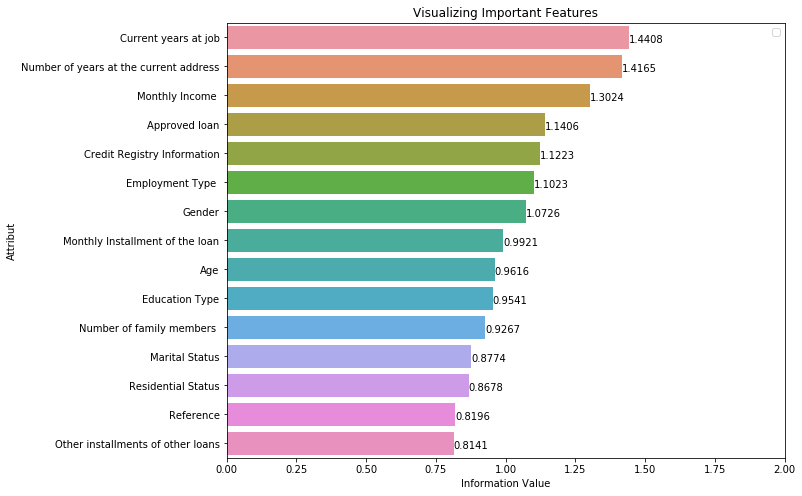

In [166]:
indices = np.argsort(df.IV)[::-1]
indices = np.array(indices)
featurerank=[]
for f in range(len(indices)):
    featurerank.append(columns[indices[f]])


plt.figure(figsize=(10,8))
feature_imp = pd.Series(np.array(df.IV),index=columns).sort_values(ascending=False)

ivlist = pd.Series(df.IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 2))
#plt.ylim((0, 1))
plt.xlabel('Information Value')
plt.ylabel('Attribut')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Loan

In [167]:
df = pd.read_excel("Data_set/Loan.xlsx")

In [168]:
df = df.loc[1:,:]
df1 = df.drop(['Date of disbursment ', 'Kod','Birthday (day/monthly/year)','Fido', 'NRP', 'Unnamed: 2',
       'Bank of Albania sector_16 (individuals)', 'Maturity date', 'Birthday (day/monthly/year).1', 'Monthly Installment of the loan-Converdted',
         'Other installments of other loans_Converted', "Type of Loan (if it's loan or overdraft)",'Currency'],axis=1)
#df1['Gender'][df1['Gender']=='F']=0
#df1['Gender'][df1['Gender']=='M']=1

y = df1['Loan classification'].copy()
y[y==1] = -1
y[y==0] = 1

X = df1.drop(['Loan classification'],axis = 1)

Y = df1['Loan classification']

badnum=len(Y[Y==-1])    # amount of bad clients
goodnum=Y.count()-badnum

In [169]:
df = X
df['Credit Registry Information'][df['Credit Registry Information']==1] = 'Credit Registry Information_Not have history'
df['Credit Registry Information'][df['Credit Registry Information']==2] = 'Credit Registry Information_Not and has not been categorized'
df['Credit Registry Information'][df['Credit Registry Information']==3] = 'Credit Registry Information_been categorized'
df['Credit Registry Information'][df['Credit Registry Information']==4] = 'Credit Registry Information_currently categorized'

df['Education Type'][df['Education Type']==1] = 'Education_Without education'
df['Education Type'][df['Education Type']==2] = 'Education_Elementary'
df['Education Type'][df['Education Type']==3] = 'Education_Secondary/Less than high school'
df['Education Type'][df['Education Type']==4] = 'Education_College/High school'
df['Education Type'][df['Education Type']==5] = 'Education_University'

df['Gender'][df['Gender']==0]='Gender_Male'
df['Gender'][df['Gender']==1]='Gender_Female'

df['Marital Status'][df['Marital Status']==1] = 'Marital Status_Single'
df['Marital Status'][df['Marital Status']==2] = 'Marital Status_Married'
df['Marital Status'][df['Marital Status']==3] = 'Marital Status_Widowed'
df['Marital Status'][df['Marital Status']==4] = 'Marital Status_Seperated'
df['Marital Status'][df['Marital Status']==5] = 'Marital Status_Divorced'

df['Residential Status'][df['Residential Status']==0] = 'Residential Status_Rent'
df['Residential Status'][df['Residential Status']==1] = 'Residential Status_Co-owner'
df['Residential Status'][df['Residential Status']==2] = 'Residential Status_Owner'
df['Residential Status'][df['Residential Status']==3] = 'Residential Status_Others'
df['Residential Status'][df['Residential Status']==4] = 'Residential Status_Live with parents'

df['Employment Type '][df['Employment Type ']==1] = 'Employment_Student'
df['Employment Type '][df['Employment Type ']==2] = 'Employment_Household'
df['Employment Type '][df['Employment Type ']==3] = 'Employment_Retired'
df['Employment Type '][df['Employment Type ']==4] = 'Employment_In expectation of the first employment'
df['Employment Type '][df['Employment Type ']==5] = 'Employment_Unemplyed'
df['Employment Type '][df['Employment Type ']==6] = 'Employment_Public sector'
df['Employment Type '][df['Employment Type ']==7] = 'Employment_Privated sector'
df['Employment Type '][df['Employment Type ']==8] = 'Employment_Self_emplyed'
df['Employment Type '][df['Employment Type ']==9] = 'Employment_Administator'

df['Reference'][df['Reference']==1]='Reference from bank staff'
df['Reference'][df['Reference']==2]='Reference not from bank staff'
df['Reference'][df['Reference']==3]='Reference_no information'

In [170]:
df.head()

,Approved loan,Duration (in months),Age,Gender,Marital Status,Number of family members,Education Type,Number of years at the current address,Employment Type,Current years at job,Residential Status,Credit Registry Information,Monthly Installment of the loan,Other installments of other loans,Monthly Income,Reference
1,190521,36,44,M,Marital Status_Married,4,Education_University,16.75,Employment_Privated sector,5.83,Residential Status_Owner,Credit Registry Information_been categorized,9235.73,63180,298949,Reference from bank staff
2,600000,12,52,F,Marital Status_Married,3,Education_University,17.58,Employment_Privated sector,5.58,Residential Status_Owner,Credit Registry Information_Not and has not be...,52071.9,0,200000,Reference from bank staff
3,500000,1,66,M,Marital Status_Married,2,Education_University,2.16,Employment_Privated sector,1.16,Residential Status_Owner,Credit Registry Information_Not have history,528636,0,100000,Reference not from bank staff
4,242146,36,33,F,Marital Status_Single,1,Education_University,16.25,Employment_Privated sector,16.25,Residential Status_Owner,Credit Registry Information_Not and has not be...,14898.1,2500,55000,Reference not from bank staff
5,635376,48,52,F,Marital Status_Widowed,1,Education_University,33.5,Employment_Privated sector,16.5,Residential Status_Owner,Credit Registry Information_Not and has not be...,17264.2,0,40000,Reference not from bank staff


In [171]:
y = df1['Loan classification'].copy()
y[y==1] = -1
y[y==0] = 1
data = X
data['target'] = y

In [172]:
data['Age'] = data['Age'].astype('int')
data['Approved loan'] = data['Approved loan'].astype('int')
data['Number of years at the current address'] = data['Number of years at the current address'].astype('float')
data['Current years at job'] = data['Current years at job'].astype('float')
data['Monthly Installment of the loan'] = data['Monthly Installment of the loan'].astype('int')
data[ 'Other installments of other loans'] = data[ 'Other installments of other loans'].astype('int')
data['Monthly Income '] = data['Monthly Income '].astype('int')
data['Duration (in months)'] = data['Duration (in months)'].astype('int')

In [173]:
data_woe = data #用於存儲所有數據的woe值
civ_list = []
n_positive = sum(data['target']==1)
n_negtive = len(data) - n_positive

for column in list(data.columns[:-1]):
    if data[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    else:            
        civ = fp.proc_woe_continuous(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(data[column], civ)

---------process continuous variable:Approved loan----------
------process continuous variable:Duration (in months)------
--------------process continuous variable:Age---------------
--------------process discrete variable:Gender--------------
----------process discrete variable:Marital Status----------
----process discrete variable:Number of family members -----
----------process discrete variable:Education Type----------
process continuous variable:Number of years at the current address
---------process discrete variable:Employment Type ---------
------process continuous variable:Current years at job------
--------process discrete variable:Residential Status--------
---process discrete variable:Credit Registry Information----
process continuous variable:Monthly Installment of the loan-
process continuous variable:Other installments of other loans
--------process continuous variable:Monthly Income ---------
------------process discrete variable:Reference-------------


In [174]:
civ_df = eval.eval_feature_detail(civ_list,'output_feature_loan.csv')

Approved loan
Duration (in months)
Age
Gender
Marital Status
Number of family members 
Education Type
Number of years at the current address
Employment Type 
Current years at job
Residential Status
Credit Registry Information
Monthly Installment of the loan
Other installments of other loans
Monthly Income 
Reference


In [175]:
DF_IV = {'Feature':civ_df['var_name'], 'IV':civ_df['iv']}
DF_IV = pd.DataFrame(DF_IV)
df = DF_IV.drop_duplicates(subset=None, keep='first', inplace=False)

In [176]:
df

,Feature,IV
0,Approved loan,1.104834
0,Duration (in months),0.883444
0,Age,1.603015
0,Gender,1.231995
0,Marital Status,0.799068
0,Number of family members,1.070328
0,Education Type,1.003115
0,Number of years at the current address,1.271279
0,Employment Type,1.083405
0,Current years at job,1.260240


In [177]:
columns = np.array(df.Feature)
columns[indices]

array(['Employment Type ', 'Education Type',
       'Other installments of other loans', 'Approved loan',
       'Residential Status', 'Number of years at the current address',
       'Age', 'Credit Registry Information', 'Duration (in months)',
       'Number of family members ', 'Marital Status', 'Gender',
       'Current years at job', 'Monthly Income ',
       'Monthly Installment of the loan'], dtype=object)

No handles with labels found to put in legend.


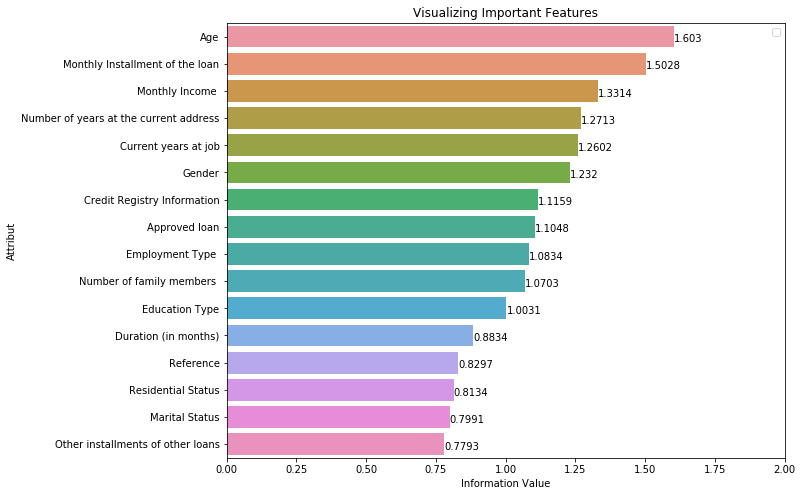

In [179]:
indices = np.argsort(df.IV)[::-1]
indices = np.array(indices)
featurerank=[]
for f in range(len(indices)):
    featurerank.append(columns[indices[f]])


plt.figure(figsize=(10,8))
feature_imp = pd.Series(np.array(df.IV),index=columns).sort_values(ascending=False)

ivlist = pd.Series(df.IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0, 2))
#plt.ylim((0, 1))
plt.xlabel('Information Value')
plt.ylabel('Attribut')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### German DataSet

In [180]:
df = pd.read_csv("german_credit.csv")

In [181]:
X = df.drop(['default'],axis = 1)
y = df['default'].copy()
y[y==1] = -1
y[y==0] = 1
data = X
data['target'] = y

In [182]:
data.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,-1
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,-1


In [183]:
data_woe = data #用於存儲所有數據的woe值
civ_list = []
n_positive = sum(data['target']==-1)
n_negtive = len(data) - n_positive

for column in list(data.columns[:-1]):
    if data[column].dtypes == 'object':
        civ = fp.proc_woe_discrete(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    else:            
        civ = fp.proc_woe_continuous(data, column, n_positive, n_negtive, 0.05*len(data), alpha=0.05)
    civ_list.append(civ)
    data_woe[column] = fp.woe_trans(data[column], civ)

-------process discrete variable:account_check_status-------
-------process continuous variable:duration_in_month--------
----------process discrete variable:credit_history----------
-------------process discrete variable:purpose--------------
---------process continuous variable:credit_amount----------
-------------process discrete variable:savings--------------
--------process discrete variable:present_emp_since---------
---process continuous variable:installment_as_income_perc---
-------process discrete variable:personal_status_sex--------
----------process discrete variable:other_debtors-----------
-------process continuous variable:present_res_since--------
-------------process discrete variable:property-------------
--------------process continuous variable:age---------------
-----process discrete variable:other_installment_plans------
-------------process discrete variable:housing--------------
-------process continuous variable:credits_this_bank--------
---------------process d

In [184]:
civ_df = eval.eval_feature_detail(civ_list,'output_feature_german.csv')

account_check_status
duration_in_month
credit_history
purpose
credit_amount
savings
present_emp_since
installment_as_income_perc
personal_status_sex
other_debtors
present_res_since
property
age
other_installment_plans
housing
credits_this_bank
job
people_under_maintenance
telephone
foreign_worker


In [185]:
DF_IV = {'Feature':civ_df['var_name'], 'IV':civ_df['iv']}
DF_IV = pd.DataFrame(DF_IV)
df = DF_IV.drop_duplicates(subset=None, keep='first', inplace=False)

In [186]:
df

,Feature,IV
0,account_check_status,3.160619
0,duration_in_month,1.175036
0,credit_history,0.210397
0,purpose,0.782047
0,credit_amount,1.396095
0,savings,0.811788
0,present_emp_since,0.527556
0,installment_as_income_perc,0.298411
0,personal_status_sex,0.371242
0,other_debtors,0.259069


In [187]:
columns = np.array(df.Feature)
columns[indices]

array(['credit_history', 'age', 'housing', 'installment_as_income_perc',
       'other_debtors', 'purpose', 'property', 'account_check_status',
       'personal_status_sex', 'savings', 'present_emp_since',
       'duration_in_month', 'credits_this_bank', 'present_res_since',
       'credit_amount', 'other_installment_plans'], dtype=object)

No handles with labels found to put in legend.


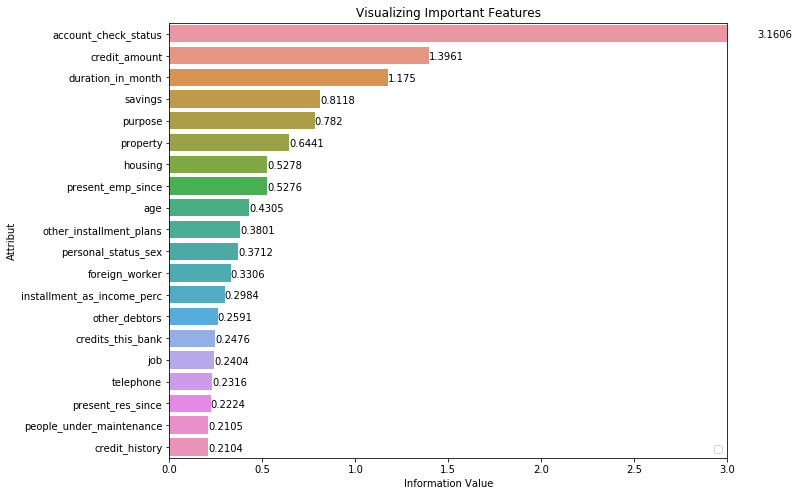

In [189]:
indices = np.argsort(df.IV)[::-1]
indices = np.array(indices)
featurerank=[]
for f in range(len(indices)):
    featurerank.append(columns[indices[f]])


plt.figure(figsize=(10,8))
feature_imp = pd.Series(np.array(df.IV),index=columns).sort_values(ascending=False)

ivlist = pd.Series(df.IV).sort_values(ascending=False)
ivlist.values
for a,b in zip(ivlist.values,np.arange(0.2,20.2,1)):
    plt.text(a, b, round(a,4))

#plt.text(ivlist.values[0]-1, 2.2, '1.148')
sns.barplot(x=feature_imp,y=feature_imp.index)

#plt.vlines(auc_complete,feature_imp.index[19], feature_imp.index[0])
plt.xlim((0,3))
#plt.ylim((0, 1))
plt.xlabel('Information Value')
plt.ylabel('Attribut')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()